### 1. Data Preparation and Loading

First, the necessary libraries for handling data and building the neural network are imported. The process begins by preparing the famous MNIST dataset, which consists of 70,000 images of handwritten digits (0-9).

*   **Transformation:** Before the images can be used by the neural network, they need to be pre-processed. A two-step transformation is defined:
    1.  **To Tensor:** The images are converted into a numerical format called a tensor, which is the primary data structure used in PyTorch.
    2.  **Normalization:** The pixel values of the images are adjusted. This is done by subtracting the mean and dividing by the standard deviation of all the images in the MNIST dataset. This standardizes the data, which helps the model train faster and more effectively.

*   **Dataset Loading:** The script then loads the MNIST dataset. It's split into two parts:
    *   **Training Set:** This is the larger portion of the data (60,000 images) that the model will learn from.
    *   **Testing Set:** This is a smaller, separate set of data (10,000 images) that the model has never seen before. It is used to evaluate the model's performance and see how well it generalizes to new examples.

*   **DataLoaders:** To handle the data efficiently during training and testing, `DataLoaders` are created. Their main jobs are:
    *   **Batching:** Instead of feeding the images to the model one by one, the DataLoader groups them into small batches (a batch size of 1024 for training and 64 for testing is specified). This is more computationally efficient.
    *   **Shuffling:** For the training data, the DataLoader shuffles the images at the beginning of each training cycle (or epoch). This prevents the model from learning the order of the data and helps it learn the actual patterns in the digits themselves.

### 2. Defining the Neural Network Architecture

The next step is to define the structure of the neural network. The model created is a simple **Fully Connected (FC)** neural network, also known as a dense network.

*   **Structure:** This network has three main layers:
    1.  **Input Layer:** This layer is designed to accept the flattened image data. Each MNIST image is 28x28 pixels, which equals 784 pixels in total. So, the input layer takes in a flat vector of 784 numbers.
    2.  **Hidden Layer:** This is an intermediate layer with 256 neurons. It receives the input from the previous layer and performs a calculation. After this calculation, a **ReLU (Rectified Linear Unit)** activation function is applied. This function introduces non-linearity, allowing the model to learn more complex patterns than a simple linear model could.
    3.  **Output Layer:** This final layer has 10 neurons, one for each possible digit (0 through 9). The neuron with the highest value in this layer will represent the model's prediction for the input image.

### 3. Training the Model

This is the core learning phase where the model adjusts its internal parameters to get better at classifying the handwritten digits.

*   **Initialization:** The model is created, and two crucial components for training are set up:
    *   **Optimizer:** The Adam optimizer is chosen. Its job is to update the model's parameters in a way that minimizes the error. A very small **learning rate** (0.00001) is set, which controls how large the updates are.
    *   **Loss Function:** The Cross-Entropy Loss function is selected. This function measures how different the model's predictions are from the actual correct labels. A higher loss value means the model's predictions are poor, while a lower loss value means it's doing well.

*   **The Training Loop:** The model is trained for 40 cycles, known as **epochs**. In each epoch, the model sees the entire training dataset once. The process within each epoch is as follows:
    1.  **Forward Pass:** A batch of images is passed through the network, and the model produces an output (a set of 10 scores for each image).
    2.  **Calculate Loss:** The loss function compares the model's output to the true labels for that batch of images to calculate the error.
    3.  **Backpropagation:** The error is sent backward through the network. This process calculates how much each parameter in the model contributed to the overall error.
    4.  **Update Parameters:** The optimizer uses the information from backpropagation to slightly adjust the model's parameters to reduce the error.
    5.  **Repeat:** This cycle repeats for every batch in the training dataset, and the entire process is repeated for 40 epochs.

During training, the loss value is recorded at every step to monitor the model's learning progress. A plot is generated to visualize how the loss decreases over time, which is a good indicator that the model is learning.

### 4. Evaluating the Model

After the training is complete, the model's performance is tested on the separate test dataset it has never seen before.

*   **Evaluation Mode:** The model is switched to evaluation mode. This turns off certain functionalities like dropout that are only used during training.
*   **Making Predictions:** The script iterates through the entire test dataset. For each image:
    1.  The image is fed through the trained model.
    2.  The model outputs 10 scores.
    3.  The position of the highest score is taken as the model's final prediction (e.g., if the 3rd neuron has the highest score, the prediction is the digit '2').

*   **Calculating Accuracy:** The model's predictions are compared to the true labels of the test images. The accuracy is then calculated as the percentage of images that the model correctly identified.

The final output shows that the model achieved approximately **91.04%** accuracy on the test set, meaning it correctly classified about 91 out of every 100 new handwritten digits it was shown.


In [78]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transform: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))   # mean & std of MNIST
])

# Download + Load Dataset
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=False,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=False,
    transform=transform
)

# Create DataLoaders
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=1024,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False
)

In [79]:
image, label = next(iter(train_loader))
image.shape

torch.Size([1024, 1, 28, 28])

In [58]:
label

tensor([4, 8, 4, 3, 7, 2, 3, 8, 0, 7, 3, 9, 2, 9, 1, 9, 8, 8, 3, 8, 9, 1, 5, 9,
        9, 1, 8, 9, 7, 7, 6, 7, 6, 9, 5, 8, 3, 1, 1, 1, 0, 0, 0, 8, 1, 2, 0, 7,
        2, 5, 7, 7, 6, 6, 4, 8, 9, 5, 8, 5, 9, 1, 7, 8, 8, 2, 2, 2, 5, 8, 4, 3,
        0, 0, 2, 1, 5, 2, 8, 4, 3, 8, 0, 7, 3, 9, 0, 0, 3, 8, 3, 1, 0, 6, 6, 4,
        4, 3, 2, 9, 2, 2, 7, 0, 0, 5, 3, 5, 1, 4, 5, 2, 8, 4, 1, 5, 1, 5, 3, 3,
        2, 9, 8, 8, 5, 2, 1, 8, 5, 2, 8, 4, 1, 7, 5, 6, 2, 2, 9, 3, 5, 9, 7, 2,
        7, 9, 4, 4, 9, 6, 5, 1, 2, 0, 0, 7, 6, 9, 1, 5, 8, 0, 0, 9, 3, 1, 5, 3,
        1, 7, 3, 8, 5, 4, 7, 7, 7, 9, 8, 3, 0, 3, 5, 1, 3, 8, 8, 1, 5, 0, 6, 4,
        1, 8, 5, 1, 4, 5, 7, 1, 1, 1, 1, 4, 3, 5, 4, 1, 9, 2, 5, 8, 0, 7, 8, 9,
        1, 7, 3, 3, 2, 1, 7, 8, 4, 4, 6, 8, 6, 6, 0, 4, 4, 5, 0, 7, 5, 8, 0, 9,
        6, 0, 7, 4, 7, 0, 1, 7, 6, 8, 2, 0, 2, 2, 8, 9])

In [25]:
# img, label = next(iter(test_loader))
# img.shape

In [59]:
image[0]

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

In [60]:
label

tensor([4, 8, 4, 3, 7, 2, 3, 8, 0, 7, 3, 9, 2, 9, 1, 9, 8, 8, 3, 8, 9, 1, 5, 9,
        9, 1, 8, 9, 7, 7, 6, 7, 6, 9, 5, 8, 3, 1, 1, 1, 0, 0, 0, 8, 1, 2, 0, 7,
        2, 5, 7, 7, 6, 6, 4, 8, 9, 5, 8, 5, 9, 1, 7, 8, 8, 2, 2, 2, 5, 8, 4, 3,
        0, 0, 2, 1, 5, 2, 8, 4, 3, 8, 0, 7, 3, 9, 0, 0, 3, 8, 3, 1, 0, 6, 6, 4,
        4, 3, 2, 9, 2, 2, 7, 0, 0, 5, 3, 5, 1, 4, 5, 2, 8, 4, 1, 5, 1, 5, 3, 3,
        2, 9, 8, 8, 5, 2, 1, 8, 5, 2, 8, 4, 1, 7, 5, 6, 2, 2, 9, 3, 5, 9, 7, 2,
        7, 9, 4, 4, 9, 6, 5, 1, 2, 0, 0, 7, 6, 9, 1, 5, 8, 0, 0, 9, 3, 1, 5, 3,
        1, 7, 3, 8, 5, 4, 7, 7, 7, 9, 8, 3, 0, 3, 5, 1, 3, 8, 8, 1, 5, 0, 6, 4,
        1, 8, 5, 1, 4, 5, 7, 1, 1, 1, 1, 4, 3, 5, 4, 1, 9, 2, 5, 8, 0, 7, 8, 9,
        1, 7, 3, 3, 2, 1, 7, 8, 4, 4, 6, 8, 6, 6, 0, 4, 4, 5, 0, 7, 5, 8, 0, 9,
        6, 0, 7, 4, 7, 0, 1, 7, 6, 8, 2, 0, 2, 2, 8, 9])

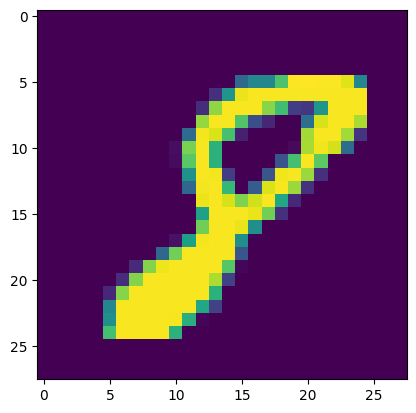

In [61]:
import matplotlib.pyplot as plt

plt.imshow(image[1].permute(1,2,0))

In [62]:
len(train_loader)

235

In [63]:
len(test_loader)

157

In [64]:
30000*2 + 157*64

70048

In [65]:
28*28

784

In [80]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

class FC_Mnist(nn.Module):
    def __init__(self,input_dim,hidden_dim,output):
        super( FC_Mnist,self).__init__()
        self.input = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim,output)

    def forward(self, x):
        x = x.view(x.size(0),-1)
        x = self.input(x)
        x = F.relu(x)
        out = self.output(x)
        return out

In [81]:
torch.manual_seed(42)
model = FC_Mnist(784,256,10)

In [86]:
image,label = next(iter(train_loader))
image.size(0)              

1024

In [87]:
label

tensor([0, 0, 3,  ..., 6, 9, 4])

In [82]:
model(image)

tensor([[-0.3247,  0.0766, -0.0559,  ...,  0.1832,  0.2229,  0.5109],
        [-0.2495,  0.1135,  0.2546,  ...,  0.1582,  0.0389,  0.0487],
        [ 0.0839,  0.0224, -0.0612,  ...,  0.2026, -0.1005, -0.0953],
        ...,
        [-0.0259,  0.0977,  0.0318,  ...,  0.0905, -0.1320,  0.0395],
        [-0.1031,  0.2244, -0.0187,  ...,  0.2226,  0.1549, -0.0723],
        [-0.2151, -0.1729,  0.4635,  ...,  0.1290,  0.1382, -0.2197]],
       grad_fn=<AddmmBackward0>)

In [94]:
model = FC_Mnist(784, 256, 10)
model.train()
optimizer = torch.optim.Adam (model.parameters(), lr = 0.00001)
criterion = nn.CrossEntropyLoss()

lossi = []
stepi = []
counter = 0 

for epoch in range (40):
    for image, label in train_loader:
        output = model(image)
        loss = criterion (output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
        stepi.append(counter)
        counter += 1
    if counter %100 == 0:
        print (f"epoch: {epoch+1} ,loss: {loss.item():.4f}")
        
        

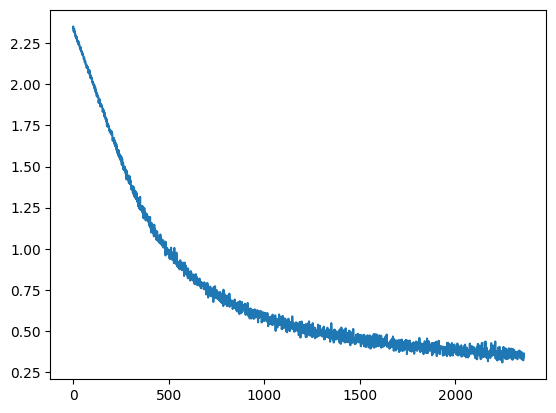

In [96]:
import matplotlib.pyplot as plt
plt.plot(stepi, lossi)

In [95]:
labels.size(0)

16

In [97]:
model.eval()
correct = 0 
total = 0 

with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _,predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total
print (f"test accuracy : {accuracy:.2f}%")

test accuracy : 91.04%
